In [ ]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

2121728/2110848 [==============================] - 0s 0us/step


In [ ]:
import numpy as np

def vectorize_sequence(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

v_train_data = vectorize_sequence(train_data)
v_test_data = vectorize_sequence(test_data)

from keras.utils.np_utils import to_categorical
o_train_label = to_categorical(train_labels)
o_test_label = to_categorical(test_labels)

In [ ]:
''' Validation, Training 데이터 나누기 '''

val_v_train_data = v_train_data[:1000]
partial_v_train_data = v_train_data[1000:]

val_o_train_label = o_train_label[:1000]
partial_o_train_label = o_train_label[1000:]

In [ ]:
''' 모델 만들기, 컴파일 하기 '''
from keras import models
from keras import layers

model = models.Sequential()

model.add(layers.Dense(64, activation = 'relu', input_shape = (10000, )))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

In [ ]:
model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
''' 모델 훈련하기 '''
history = model.fit(partial_v_train_data,
                    partial_o_train_label,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (val_v_train_data, val_o_train_label))

Epoch 1/20
16/16 [==============================] - 2s 52ms/step - loss: 2.5555 - accuracy: 0.5030 - val_loss: 1.7190 - val_accuracy: 0.6470
Epoch 2/20
16/16 [==============================] - 1s 39ms/step - loss: 1.4042 - accuracy: 0.7063 - val_loss: 1.3094 - val_accuracy: 0.7300
Epoch 3/20
16/16 [==============================] - 1s 38ms/step - loss: 1.0508 - accuracy: 0.7735 - val_loss: 1.1359 - val_accuracy: 0.7570
Epoch 4/20
16/16 [==============================] - 1s 38ms/step - loss: 0.8407 - accuracy: 0.8195 - val_loss: 1.0368 - val_accuracy: 0.7790
Epoch 5/20
16/16 [==============================] - 1s 37ms/step - loss: 0.6801 - accuracy: 0.8548 - val_loss: 0.9818 - val_accuracy: 0.7810
Epoch 6/20
16/16 [==============================] - 1s 37ms/step - loss: 0.5489 - accuracy: 0.8859 - val_loss: 0.9300 - val_accuracy: 0.8080
Epoch 7/20
16/16 [==============================] - 1s 38ms/step - loss: 0.4473 - accuracy: 0.9072 - val_loss: 0.9262 - val_accuracy: 0.8040
Epoch 8/20
16

In [ ]:
history_dict = history.history

In [ ]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

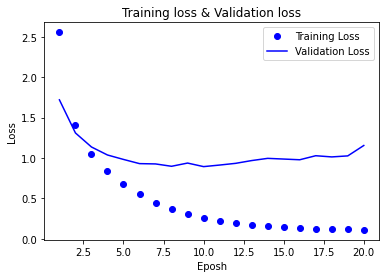

In [ ]:
import matplotlib.pyplot as plt

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.xlabel('Eposh')
plt.ylabel('Loss')
plt.title('Training loss & Validation loss')
plt.legend()

plt.show()

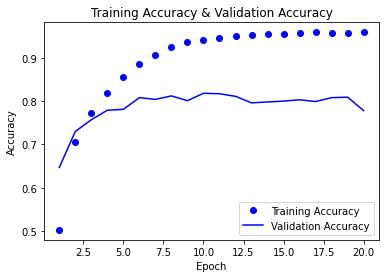

In [ ]:
plt.clf()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy & Validation Accuracy')
plt.legend()

plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000, )))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(v_train_data, o_train_label,
          epochs = 9, batch_size = 512)

results = model.evaluate(v_test_data, o_test_label)

Epoch 1/9
18/18 [==============================] - 1s 36ms/step - loss: 2.6095 - accuracy: 0.5523
Epoch 2/9
18/18 [==============================] - 1s 35ms/step - loss: 1.3557 - accuracy: 0.7280
Epoch 3/9
18/18 [==============================] - 1s 36ms/step - loss: 1.0055 - accuracy: 0.7840
Epoch 4/9
18/18 [==============================] - 1s 35ms/step - loss: 0.7864 - accuracy: 0.8343
Epoch 5/9
18/18 [==============================] - 1s 35ms/step - loss: 0.6187 - accuracy: 0.8711
Epoch 6/9
18/18 [==============================] - 1s 35ms/step - loss: 0.4876 - accuracy: 0.8975
Epoch 7/9
18/18 [==============================] - 1s 35ms/step - loss: 0.3918 - accuracy: 0.9145
Epoch 8/9
18/18 [==============================] - 1s 36ms/step - loss: 0.3191 - accuracy: 0.9326
Epoch 9/9
71/71 [==============================] - 0s 2ms/step - loss: 0.9573 - accuracy: 0.7947


In [ ]:
print(results)

[0.9573360681533813, 0.7947462201118469]


In [ ]:
''' 다중 분류 모델 종료 '''

' 다중 분류 모델 종료 '